# 컨볼루션 신경망 (CNN)을 이용한 Fachion MNIST 의류 예측하기

## 데이터 준비하기

In [1]:
from keras.datasets.fashion_mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()
print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
X_train.shape :  (60000, 28, 28)
X_test.shape :  (10000, 28, 28)


## 데이터 전처리


*   스케일링 (범위 축소, 0~1)
*   레이블 범주형으로 변경



### 데이터 스케일링 (범위축소, 0~1)

In [ ]:
# 값의 범위를 0~255 -> minmax 알고리즘을 사용 -> 0~1 범위 축소
X_train = X_train /255
X_test = X_test/255


### 레이블 : 범주형으로 변경

In [3]:
from keras.utils import to_categorical

# 실제 정답 비교를 위해 0~9 라벨링된 데이터 따로 저장
real_y_test = y_test

# 각 데이터의 레이블을 범주형으로 변경
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('real_y_test[0] : ', real_y_test[0])
print('y_test[0] : ', y_test[0])

real_y_test[0] :  9
y_test[0] :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## 검증 데이터셋 분리

In [4]:
from sklearn.model_selection import train_test_split

# 훈련 데이터셋 (70%), 검증 데이터셋 (30%)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=7)

print('X_train.sheap : ', X_train.shape)
print('X_val.sheap : ', X_val.shape) # 확인 작업

X_train.sheap :  (42000, 28, 28)
X_val.sheap :  (18000, 28, 28)


## CNN 모델 구성하기

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D # 폴림층

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, strides=(1,1), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) # 10개로 최종 출력, softmax


## 모델 설정하기

In [7]:
model.compile(optimizer='adam', # 옵티마이저
              loss = 'categorical_crossentropy', # 손실함수
              metrics=['acc']) # 모니터링 할 평가지표

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

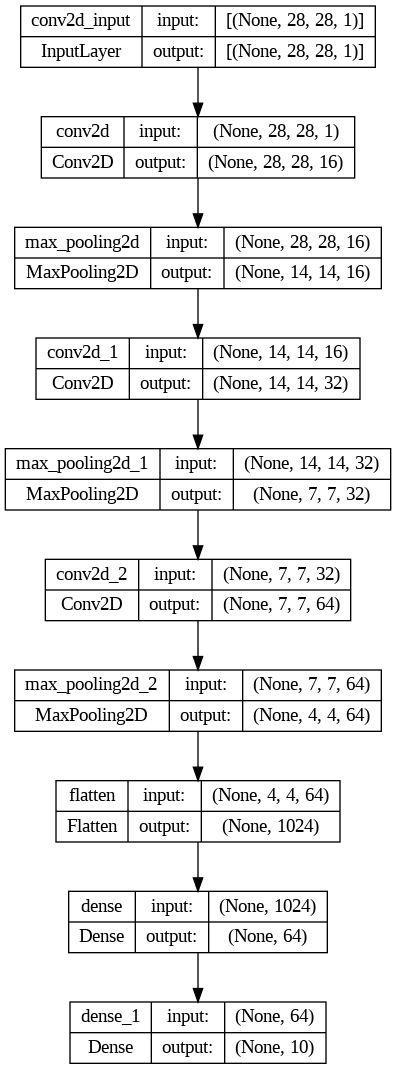

In [9]:
from keras.utils import plot_model

plot_model(model, 'model.png' ,show_shapes=True)

## 모델 학습하기

In [10]:
history = model.fit(X_train, y_train,
          epochs = 30,
          batch_size = 32,
          validation_data = (X_val, y_val))

Epoch 1/30
1313/1313 [==============================] - 19s 6ms/step - loss: 0.5192 - acc: 0.8117 - val_loss: 0.3515 - val_acc: 0.8754
Epoch 2/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3367 - acc: 0.8786 - val_loss: 0.2961 - val_acc: 0.8934
Epoch 3/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2900 - acc: 0.8946 - val_loss: 0.3210 - val_acc: 0.8828
Epoch 4/30
1313/1313 [==============================] - 7s 6ms/step - loss: 0.2596 - acc: 0.9062 - val_loss: 0.2728 - val_acc: 0.9006
Epoch 5/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2367 - acc: 0.9140 - val_loss: 0.2492 - val_acc: 0.9099
Epoch 6/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2174 - acc: 0.9204 - val_loss: 0.2636 - val_acc: 0.9042
Epoch 7/30
1313/1313 [==============================] - 7s 6ms/step - loss: 0.1977 - acc: 0.9253 - val_loss: 0.2416 - val_acc: 0.9128
Epoch 8/30
1313/1313 [==============================] - 7s 5m

## 학습 결과 분석

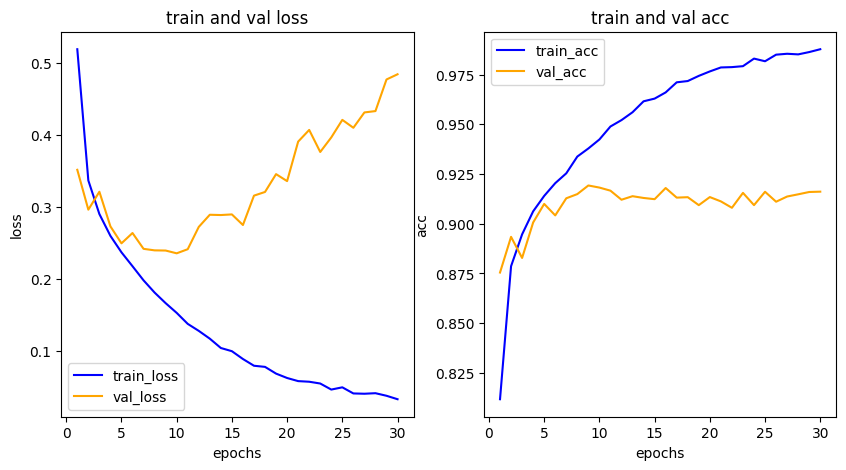

In [11]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

## 모델 평가하기

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5706 - acc: 0.9077


[0.5705781579017639, 0.9077000021934509]

*   이미지(2차원) 가능 : Dense 층으로만 학습을 하다보면 사이의 규칙을 파악하기 힘듦. -> 이미지 학습에 특화되어 있음.
*   필터의 개념 사용 : 특성을 잘 찾아낼 수 있음.
*   컨볼루션 연산 -> 특징맵 추출 가능
*   strides -> 하이퍼파라미터, 이동 간격(스텝)
*   kernel_size -> 필터의 크기 나타냄
*   padding -> 가장자기 주변에 추가되는 여분의 픽셀 or 값
*   중요한 특징만 나오도록 학습시킴
*   MaxPooling -> 최대 풀링, 두드러진 아이만 가져옴 -> 아무리 이미지가 작아져도 위치는 변하지 않음 :: 이동 불변성
*  평균 폴링 -> 오브젝트가 두드러지지 않는 경우가 있음. 그때 적용.










### Conv2D(filters = 16, kernel_size = 3, strides = (1, 1), padding = ‘same’, activation = ‘relu’, input_shape = (28, 28, 1))
*   filters: 특징맵 차원을 결정, filters = 16은 16개의 컨볼루션 필터를 사용한다는 의미이며, 특징맵 형태는
(batch_size, rows, cols, filters)가 됩니다.
*   kernel_size: (3,3)과 같이 튜플 형태로 필터 크기를 설정. 위 경우처럼 하나의 숫자 k를 전달할 경우 자동으
로 (k, k) 필터 크기로 설정됩니다.
*   strides: 스트라이드 크기를 지정합니다. 기본값은 (1, 1)으로 kernel_size와 같이 하나의 숫자 형태로 제공할
수 있습니다.
*   padding: 패딩에 대한 결정 여부를 지정합니다. ‘same’은 패딩을 사용하여 입출력 형태가 동일하도록 하며,
‘valid’는 패딩을 사용하지 않습니다. 기본값은 ‘valid’입니다.
*   activation: 사용할 활성화 함수를 문자열 또는 클래스 형태로 제공합니다.






